# TZ Gaming: Optimal Targeting of Mobile Ads

In [25]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns

# increase plot resolution
# mpl.rcParams["figure.dpi"] = 200

In [26]:
# check that you have version 0.9.13 of the pyrsm package
# install in a terminal using: pip install --user "pyrsm>=0.9.13"
rsm.__version__

'0.9.20'

In [27]:
# loading data tz_gaming.parquet
tz_gaming = pd.read_parquet("data/tz_gaming.parquet")

> Note: Review the data description carefully and watch the "Video: TZ gaming preview (12 min)" linked on Canvas

> Note: Full question details are contained in the tz-gaming-msba.pdf file


## Part I: Logistic regression (10 points)

a. Estimate a logistic regression model with the following variables `time_fct app mobile_os impua clua ctrua` as the explanatory variables (features) and `click` as the response variable (target)

> Note: Use only the rows that are labeled `train` in the `training` variable

In [28]:
lr = rsm.model.logistic(
    data={"tz_gaming": tz_gaming[(tz_gaming['training'] == 'train')]}, rvar="click", lev='yes', evar= ['time_fct', 'app', 'mobile_os', 'impua', 'clua', 'ctrua'])

lr.summary()

Logistic regression (GLM)
Data                 : tz_gaming
Response variable    : click
Level                : yes
Explanatory variables: time_fct, app, mobile_os, impua, clua, ctrua
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                     OR      OR%  coefficient   std.error  z.value p.value     
Intercept         0.029   -97.1%        -3.53       0.197  -17.936  < .001  ***
time_fct[2]       0.622   -37.8%        -0.47       0.321   -1.478   0.139     
time_fct[3]       0.718   -28.2%        -0.33       0.454   -0.730   0.466     
time_fct[4]       0.000  -100.0%       -23.54   42007.161   -0.001     1.0     
time_fct[5]       0.000  -100.0%       -23.72   55229.970   -0.000     1.0     
time_fct[6]       0.349   -65.1%        -1.05       1.021   -1.030   0.303     
time_fct[7]       1.221    22.1%         0.20       0.426    0.468    0.64     
time_fct[8]       1.104    10.4%         0.10       0.296    0.335   0.737     
time_fct

b. Summarize and interpret the logistic regression results. Which of these explanatory variables are statistically significant? Which variables seem to be most "important"? Make sure your model evaluation includes (1) an interpretation of the Permutation importance and Prediction plots for the explanatory variables `mobile_os`, `impua`, `clua`, and `ctrua` and (2) an evaluation of the model as a whole using Pseudo R-squared and the Chi-square test (5 points).

In [29]:
lr.coef[72:]

,index,OR,OR%,coefficient,std.error,z.value,p.value,
72,mobile_os[T.ios],0.449990,-55.001043,-0.798531,0.076484,-10.440490,1.619726e-25,***
73,mobile_os[T.other],0.719031,-28.096926,-0.329851,0.183119,-1.801291,7.165707e-02,.
74,impua,0.978712,-2.128790,-0.021518,0.001890,-11.386231,4.897168e-30,***
75,clua,1.294994,29.499356,0.258506,0.058063,4.452135,8.502082e-06,***
76,ctrua,1.021596,2.159579,0.021366,0.002359,9.057640,1.333028e-19,***


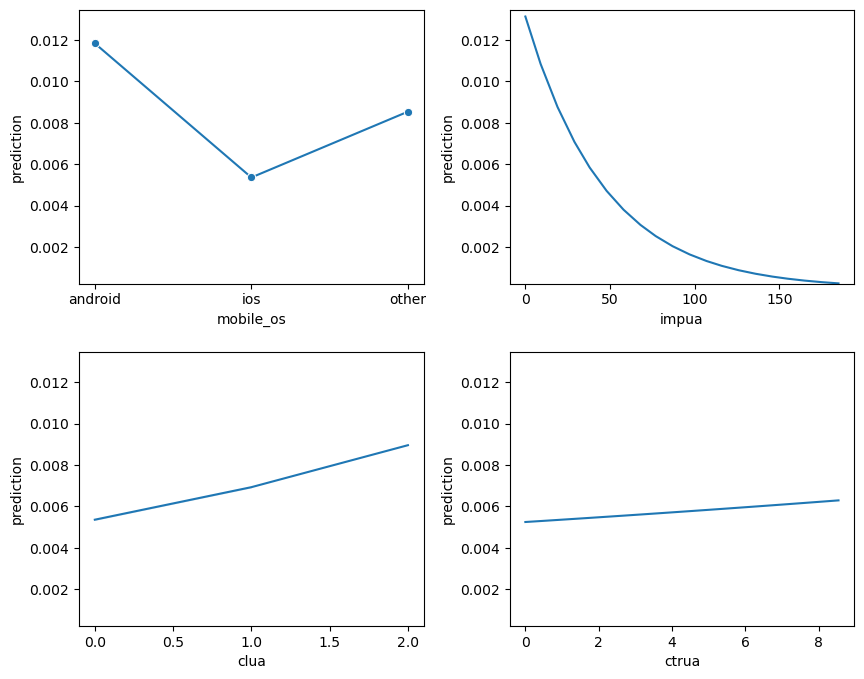

In [30]:
# discuss and add code to calculate additional statistics as needed
lr.plot (plots="pred", incl=['mobile_os', 'impua', 'clua' , 'ctrua'])

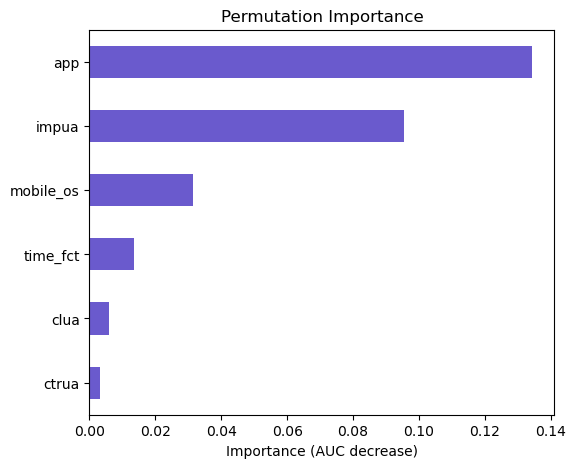

In [31]:
lr.plot (plots="vimp", incl=['mobile_os', 'impua', 'clua' , 'ctrua'])

/opt/conda/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


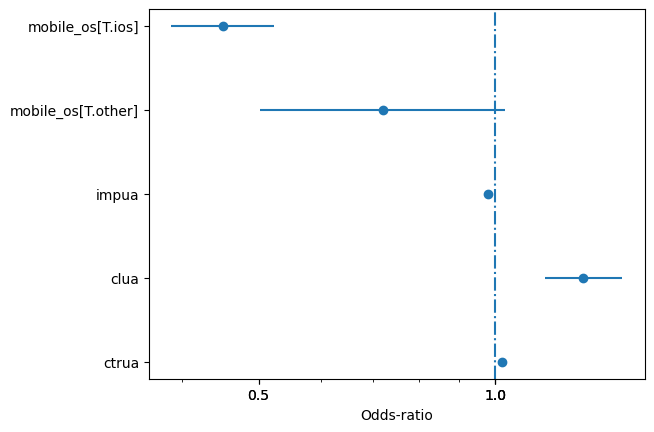

In [32]:
lr.plot(incl=["mobile_os","impua","clua","ctrua"])

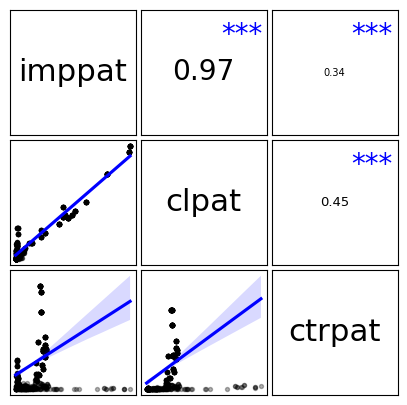

In [33]:
cr=rsm.basics.correlation(tz_gaming[["imppat","clpat", "ctrpat"]])
cr.plot()

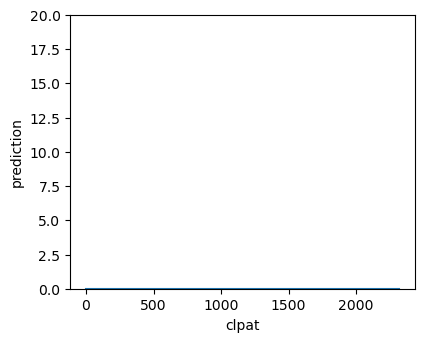

In [34]:
lr.plot (plots="pred", incl='clpat', fix=(0, 20))

**Statistically Significant Variables:**
The p-values for variables like mobile_os[ios], impua, clua, ctrua, and several app categories (like app[app2], app[app4], app[app13], etc.) are significant as their p-values are less than 0.05. The large standard errors and extreme coefficient values for some time_fct and app categories (e.g., time_fct[4], app[app8]) suggest potential issues with multicollinearity.

**Importance of Variables:**
Variables with OR far from 1, and with significant p-values, are more influential. mobile_os[ios] has an OR of 0.450, indicating a substantial decrease in the odds of clicking compared to the baseline OS.
Negative coefficients indicate a decrease in log-odds of the outcome ('click') with an increase in the variable, while positive coefficients indicate an increase.

**Permutation Importance Plot:**
The app variable has the highest importance, significantly impacting model predictions when shuffled.
impua follows, showing notable importance. mobile_os has moderate importance, suggesting the mobile operating system does influence the likelihood of a click but less so than the app or impua. time_fct, clua (number of past impressions of the TZ ad that the user has clicked on across all apps), and ctrua (past CTR of the TZ ad by the user across all apps) have the least importance according to this permutation importance measure.

**Prediction Plots:**
Mobile OS: The prediction plot shows that users with the 'android' OS have a higher predicted click rate than those with 'ios', with 'other' OS having the lowest. This suggests that the mobile OS is a predictor of click behavior, with 'android' users being more likely to click on the ad. keeping all else constant
Impua: There is a sharp decrease in the predicted probability of clicking as the number of impressions (impua) increases. This could indicate ad fatigue; as users see more ads, they are less likely to click. Keeping all else constant
Clua: The prediction plot for clua shows an increasing trend, indicating that users who have clicked more in the past are predicted to have a higher probability of clicking on future ads. Keeping all else constant
Ctrua: The plot for ctrua is relatively flat, suggesting that the past click-through rate does not have a strong impact on the predicted probability of clicking within the observed range of data.Keeping all else constant

**Model Evaluation:**
Pseudo R-squared (McFadden): The value of 0.109 indicates that the model has moderate explanatory power. 
Chi-square Test: The significant Chi-square test result suggests the model fits significantly better than an empty model.


c. Predict the probability of a click (2 point)

The estimated logistic regression model can predict the probability of a click. Create a new variable `pred_logit` with the predicted click-through probabilities linked to each impression. Make sure to generate predictions for all rows in the training and test data.


In [35]:
tz_gaming["pred_logit"] = lr.predict(data = tz_gaming)["prediction"]
tz_gaming.head()


,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,imput,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,25,0,0.000000,71,1,1.408451,-1.207066,0.003961,id247135,3.382977e-13
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,7,0,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079,1.156355e-02
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,94,0,0.000000,331,1,0.302115,1.084441,0.003961,id927245,2.655311e-03
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,19,0,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188,1.349420e-02
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,329,4,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833,1.868222e-03


d. Estimate a logistic regression with `click` as the response variable and `rnd` as the **only** explanatory variable. As before, the model should be estimated on the training sample (i.e., "training == 'train'"). Create a new variable `pred_rnd` with the predicted click-through probabilities (1 point).

In [36]:
lr_rnd = rsm.model.logistic(
    data={"tz_gaming": tz_gaming[(tz_gaming['training'] == 'train')]}, rvar="click", lev='yes', evar= ['rnd'])
lr_rnd.summary()
tz_gaming["pred_rnd"] = lr_rnd.predict(data = tz_gaming)["prediction"]
tz_gaming.head()

Logistic regression (GLM)
Data                 : tz_gaming
Response variable    : click
Level                : yes
Explanatory variables: rnd
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.009  -99.1%        -4.72      0.036 -130.657  < .001  ***
rnd        0.965   -3.5%        -0.04      0.036   -0.986   0.324     

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.0
Pseudo R-squared (McFadden adjusted): -0.0
Area under the RO Curve (AUC): 0.513
Log-likelihood: -4429.726, AIC: 8863.451, BIC: 8882.211
Chi-squared: 0.972, df(1), p.value 0.324 
Nr obs: 87,535


,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,0,0.000000,71,1,1.408451,-1.207066,0.003961,id247135,3.382977e-13,0.009222
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,0,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079,1.156355e-02,0.008751
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,0,0.000000,331,1,0.302115,1.084441,0.003961,id927245,2.655311e-03,0.008505
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,0,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188,1.349420e-02,0.009600
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,4,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833,1.868222e-03,0.008704


## Part II: Understanding Multicollinearity (10 points)

a. Estimate a logistic regression model with `click` as the response variable and `imppat`, `clpat`, and `ctrpat` as the only explanatory variables. What is the interpretation of the Prediction plots for the explanatory variables? (2 points)

> Note: Make sure to watch the "Video: TZ gaming preview (12 min)" on Canvas before answering this questions so you fully understand what the variables represent

In [37]:
lr_mc1 = rsm.model.logistic(
    data = {"tz_gaming": tz_gaming[(tz_gaming['training'] == 'train')]},
    rvar = "click",
    lev = "yes",
    evar = ["imppat", "clpat","ctrpat"]
)
lr_mc1.summary(vif = True)

Logistic regression (GLM)
Data                 : tz_gaming
Response variable    : click
Level                : yes
Explanatory variables: imppat, clpat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%        -5.42      0.073  -74.156  < .001  ***
imppat     1.000   -0.0%        -0.00      0.000   -4.802  < .001  ***
clpat      1.002    0.2%         0.00      0.000    5.713  < .001  ***
ctrpat     1.615   61.5%         0.48      0.034   13.933  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.035
Pseudo R-squared (McFadden adjusted): 0.035
Area under the RO Curve (AUC): 0.676
Log-likelihood: -4273.088, AIC: 8554.176, BIC: 8591.695
Chi-squared: 314.248, df(3), p.value < 0.001 
Nr obs: 87,535

Variance inflation factors:

           vif    Rsq
clpat   26.242  0.962
imppat  23.467  0.957
ct

Based on the prediction plots for the explanatory variables imppat, clpat, and ctrpat:

**imppat (Number of past impressions within the app in the hour):**
The plot shows a downward trend, meaning as the number of past impressions increases, the predicted probability of clicking on the ad decreases. This could indicate potential ad fatigue or overexposure.

**clpat (Number of past clicks on the TZ ad in the app in the hour):**
There is an upward trend in this plot, indicating that the more a user has clicked on past ads within the app in the hour, the higher the predicted probability of clicking on a future ad. This suggests that users who are already engaging with the ads are more likely to continue doing so.

**ctrpat (Past Click-Through Rate of the TZ ad in the app in the hour):**
The plot is relatively flat, suggesting that the past click-through rate within the app in the hour has a minimal impact on the predicted probability of a click. This could mean that the historical CTR is not a strong predictor of future clicks within the same hour for the TZ ad.

In conclusion, clpat is positively associated with the likelihood of a click, whereas imppat is negatively associated. ctrpat appears to have a negligible effect on the click prediction within the same hour

... discuss the results here ...

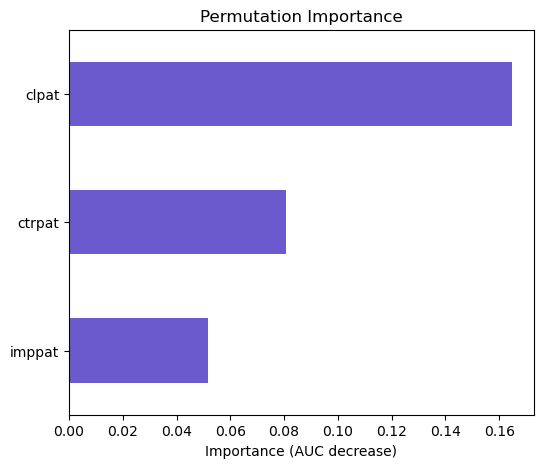

In [38]:
#Permutation importance
lr_mc1.plot("vimp")

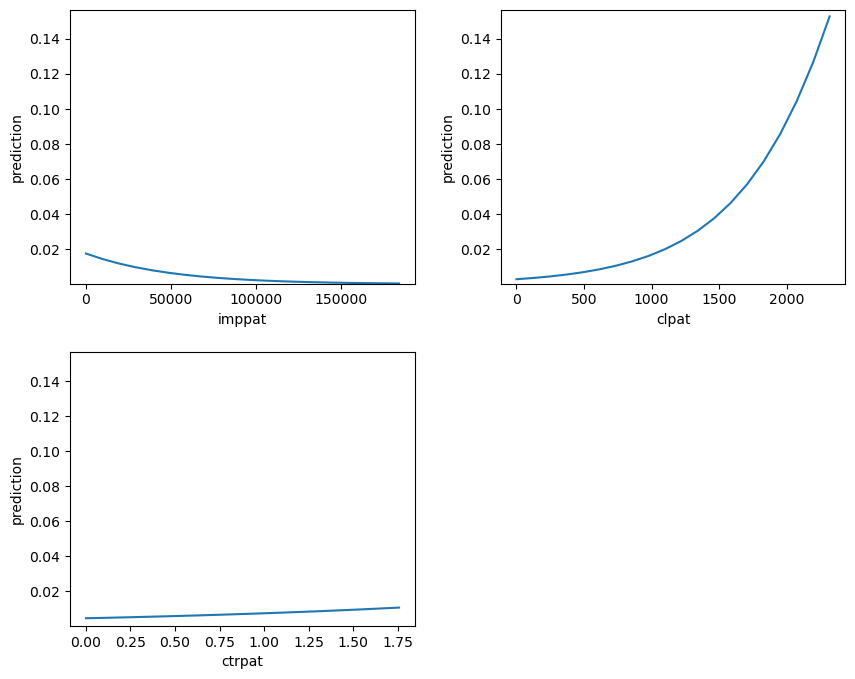

In [39]:
lr_mc1.plot("pred")

b. Some of the variables in the dataset are highly correlated with each other. In particular, `imppat` and `clpat` have a strong positive correlation of 0.97. Discuss the implications of this (very) high level of collinearity and also different approaches to deal with it. What are the implications for the model and the interpretation of the Prediction plots? As part of your answer, discuss the change in the Prediction plot for `imppat` when you remove `clpat` from the model you estimated for II.a (4 points).

**Implications for the Model:**
Coefficients can become unstable and sensitive to minor changes in the model or data. This can lead to inflated standard errors and less reliable statistical tests for the coefficients of the correlated variables.
It may also exaggerate the importance of one variable over another or mask the true effect of each variable on the response.

**Interpretation of Prediction Plots:**
The slope of the prediction line for imppat might be exaggerated due to its correlation with clpat, as clpat itself is a strong predictor of clicks.The prediction plot for clpat might be less steep than it would be if imppat were not in the model, as some of the shared variance between the two variables is attributed to imppat.

**Dealing with Collinearity:**

Remove One of the Correlated Variables: You could drop either imppat or clpat from the model. This simplifies the model and mitigates the collinearity issue, but at the expense of losing some information.
Combine the Variables: If imppat and clpat represent similar underlying phenomena, combining them into a single metric might be appropriate.
Regularization: Techniques like Ridge or Lasso regression can be used to penalize the coefficients of the regression model, which can help in dealing with multicollinearity.

**Implications of Removing clpat:**


With clpat removed from the model, the results for imppat and ctrpat in the logistic regression are now more reliable in terms of their independent effects on the likelihood of a click:
imppat: The Odds Ratio (OR) is exactly 1, with a coefficient close to 0, which suggests no change or a very minimal increase in the odds of clicking with more impressions, holding ctrpat constant.
ctrpat: The OR of 1.733 indicates that as the past click-through rate increases by one unit, the odds of clicking on an ad increase by 73.3%, which is a substantial positive effect.

The Pseudo R-squared values are slightly lower, indicating that clpat did contribute to the model's explanatory power.
The lack of multicollinearity is now evident in the VIF scores, which are both close to 1, indicating that the remaining predictors are not linearly related.




> Note: Assign your new model without `clpat` to a new object `lr_mc2`. Calculate VIF statistics for each explanatory variable in the model


In [40]:
lr_mc2 = rsm.model.logistic(
    data = {"tz_gaming": tz_gaming[(tz_gaming['training'] == 'train')]},
    rvar = "click",
    lev = "yes",
    evar = ["imppat","ctrpat"]
)
lr_mc2.summary(vif=True)

Logistic regression (GLM)
Data                 : tz_gaming
Response variable    : click
Level                : yes
Explanatory variables: imppat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%        -5.53      0.068  -80.814  < .001  ***
imppat     1.000    0.0%         0.00      0.000    5.460  < .001  ***
ctrpat     1.733   73.3%         0.55      0.030   18.422  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.031
Pseudo R-squared (McFadden adjusted): 0.031
Area under the RO Curve (AUC): 0.674
Log-likelihood: -4290.903, AIC: 8587.805, BIC: 8615.945
Chi-squared: 278.619, df(2), p.value < 0.001 
Nr obs: 87,535

Variance inflation factors:

          vif    Rsq
imppat  1.134  0.118
ctrpat  1.134  0.118


c. Estimate another logistic regression model with `click` as the response variable and `time_fct`, `app`, `imppat`, `clpat`, and `ctrpat` as the explanatory variable. Why are the Prediction plots for `imppat`, `clpat`, and `ctrpat` different compared to the plots from the model you estimated in II.a? Please be specific and investigate beyond simply stating the statistical problem (4 points).


In [41]:
lr_mc3 = rsm.model.logistic(
    data = {"tz_gaming": tz_gaming[(tz_gaming['training'] == 'train')]},
    rvar = "click",
    lev = "yes",
    evar = ["time_fct","app", "imppat","clpat","ctrpat"]
)
lr_mc3.summary(vif = True)

Logistic regression (GLM)
Data                 : tz_gaming
Response variable    : click
Level                : yes
Explanatory variables: time_fct, app, imppat, clpat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                 OR      OR%  coefficient   std.error  z.value p.value     
Intercept     0.012   -98.8%        -4.42       0.284  -15.575  < .001  ***
time_fct[2]   0.588   -41.2%        -0.53       0.323   -1.644     0.1     
time_fct[3]   0.693   -30.7%        -0.37       0.461   -0.795   0.426     
time_fct[4]   0.000  -100.0%       -23.83   43904.903   -0.001     1.0     
time_fct[5]   0.000  -100.0%       -23.86   57249.164   -0.000     1.0     
time_fct[6]   0.359   -64.1%        -1.03       1.027   -0.999   0.318     
time_fct[7]   1.220    22.0%         0.20       0.438    0.453    0.65     
time_fct[8]   1.135    13.5%         0.13       0.309    0.411   0.681     
time_fct[9]   1.063     6.3%         0.06       0.29

 ... insert your answer here ...

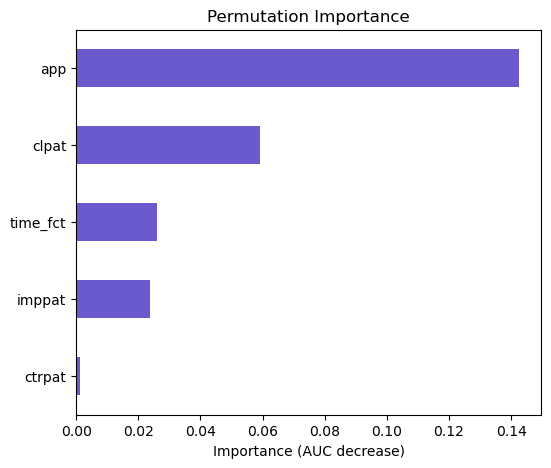

In [42]:
lr_mc3.plot("vimp")

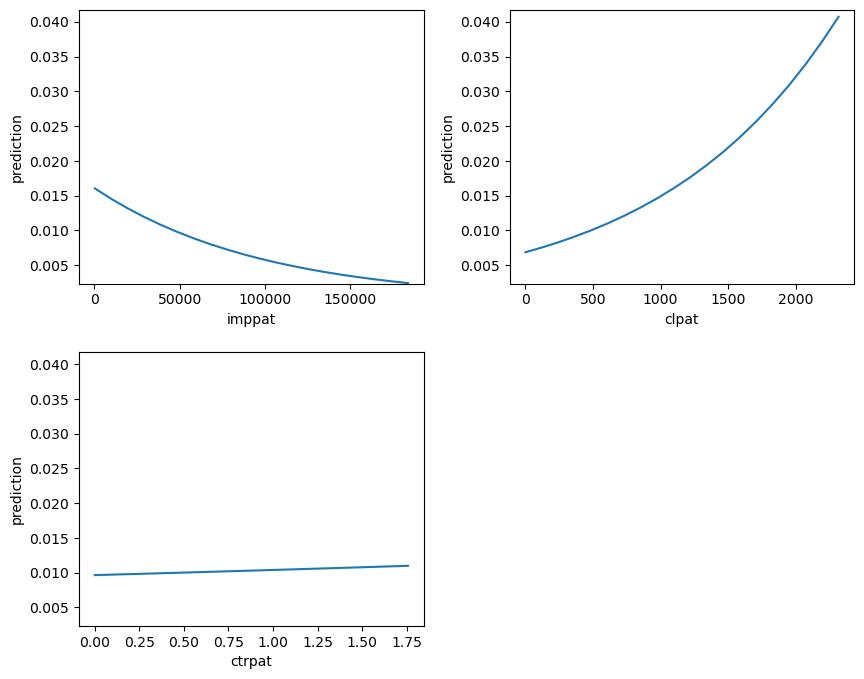

In [43]:
lr_mc3.plot(plots="pred", incl=["imppat","clpat","ctrpat"])

The difference in the Prediction plots for imppat, clpat, and ctrpat in the models with and without clpat can be attributed to the following reasons:

Modeling Dynamics:

In the model that includes both imppat and clpat, their high collinearity distorts the individual effect of each variable due to shared variance. The model's ability to distinguish the unique contribution of each variable is compromised, leading to less accurate coefficients and, by extension, prediction plots.
When clpat is included, the prediction plot for imppat might be flatter because its effect is being overshadowed by clpat, which has a strong positive correlation and a strong effect on the response.
Collinearity Impact:

The high VIF values for imppat and clpat when included in the same model indicate significant multicollinearity, which can inflate the variance of the estimated coefficients, leading to wider confidence intervals and less reliable predictions.
The collinearity between imppat and clpat can also lead to counterintuitive model coefficients. This is because when two predictors are highly correlated, the logistic regression model might attribute the effect of one predictor to the other or spread the effect across both predictors in a way that doesn't accurately reflect their individual predictive power.
Changes in Prediction Plot for imppat:

The prediction plot for imppat in the model without clpat likely shows a stronger relationship with the click probability, as the shared variance between imppat and clpat is no longer present, allowing imppat to exhibit its own effect more clearly.
Variable Importance:

The inclusion or exclusion of clpat changes the model's structure, which can affect the relative importance of other variables. As seen from the permutation importance plot, imppat appears to have more importance when clpat is not in the model, indicating its effect was previously underestimated due to the shared influence with clpat.
In summary, when clpat is removed, imppat likely shows a more pronounced and potentially different relationship with the response variable in the prediction plot. This change highlights the importance of addressing collinearity in regression models, as it can significantly impact the interpretation of model coefficients and the trustworthiness of prediction plots.

In [44]:
tz_std=rsm.scale_df(tz_gaming)
tz_std.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd
0,train,I7,no,-0.541031,9,app8,ios,-0.174831,-0.115459,-0.061681,...,-0.164860,-0.093053,-0.447543,-0.390162,0.313417,-0.605740,-0.195331,id247135,-0.342117,0.609520
1,train,I23,no,-0.057118,15,app1,ios,-0.267731,-0.253726,-0.128633,...,-0.164860,-0.093053,0.219916,0.363845,0.435379,0.137290,-0.195331,id245079,0.105922,-0.145262
2,train,I28,no,-0.299075,12,app5,ios,-0.263767,-0.253726,-0.128633,...,-0.164860,-0.093053,-0.444962,-0.390162,-0.437545,0.541222,-0.195331,id927245,-0.239235,-0.539417
3,train,I30,no,0.265490,19,app1,ios,-0.277392,-0.253726,-0.128633,...,-0.164860,-0.093053,0.257656,0.315837,0.312839,-1.175657,0.403052,id922188,0.180727,1.215606
4,train,I35,no,0.668751,24,app1,android,0.666226,1.751152,-0.017475,...,1.856303,0.059911,1.376736,1.244932,0.212823,0.213218,-0.195331,id355833,-0.269731,-0.220205


In [45]:
from sklearn.decomposition import PCA
pca = PCA (n_components=1)
pca.fit(tz_std [ ["imppat", "clpat"]])
tz_std["fct_pat"] = pca.transform(tz_std[ ["imppat", "clpat"]])
tz_std[["imppat","clpat","fct_pat"]].corr().round(3)

,imppat,clpat,fct_pat
imppat,1.000,0.973,0.993
clpat,0.973,1.000,0.993
fct_pat,0.993,0.993,1.000


## Part III: Decile Analysis of Logistic Regression Results (5 points)

> Note: For the following questions, use only the "test" sample of impressions (i.e., 27,953 rows
where "training == 'test'")

a. Assign each impression to a decile based on the predicted probability of click through (`pred_logit`) based on the model estimated in I.a. Create a new variable `pred_logit_dec` that captures this information. Note: The first decile should have the highest average click-through rate. If not, make sure to "reverse" the decile numbers (i.e., 10 becomes 1, 9 becomes 2, etc.). Use the `xtile` function from the `pyrsm` package to create the deciles (2 points)

In [46]:
tz_gaming["pred_logit_dec"] =tz_gaming.groupby(tz_gaming.training == 'test').pred_logit.transform(rsm.xtile,10, rev = True)
tz_gaming.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd,pred_logit_dec
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,0.000000,71,1,1.408451,-1.207066,0.003961,id247135,3.382977e-13,0.009222,10
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079,1.156355e-02,0.008751,3
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,0.000000,331,1,0.302115,1.084441,0.003961,id927245,2.655311e-03,0.008505,7
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188,1.349420e-02,0.009600,3
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833,1.868222e-03,0.008704,8


In [47]:
tz_gaming.pred_logit_dec.value_counts()

pred_logit_dec
3     11584
9     11553
5     11553
6     11552
10    11550
1     11550
4     11549
7     11548
8     11546
2     11503
Name: count, dtype: int64

b. Report the number of impressions, the number of clicks, and the click-through rate for the TZ ad per decile and save this information to a DataFrame. Use the name `dec_tab` for the new data frame (2 points)

In [48]:
tz_gaming.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd,pred_logit_dec
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,0.000000,71,1,1.408451,-1.207066,0.003961,id247135,3.382977e-13,0.009222,10
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079,1.156355e-02,0.008751,3
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,0.000000,331,1,0.302115,1.084441,0.003961,id927245,2.655311e-03,0.008505,7
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188,1.349420e-02,0.009600,3
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833,1.868222e-03,0.008704,8


In [49]:
tz_gaming['click_yes'] = np.where(tz_gaming['click'] == 'yes', 1, 0)

In [50]:
# your data frame should have columns called 'nr_impressions', 'nr_clicks', and 'ctr'
# to calculate these values you need deciles, the number of rows (impressions)
# in each decile, the number of clicks in each decile using the `click` variable,
# and the ratio of clicks to impressions (ctr)
dec_tab =(
    tz_gaming[tz_gaming.training == 'test'].groupby("pred_logit_dec")
    .agg(
        nr_impressions = ("inum","count"),
        nr_clicks = (('click_yes'),"sum"),
        ctr = ("click_yes","mean")
    )
    .reset_index()
)
dec_tab

,pred_logit_dec,nr_impressions,nr_clicks,ctr
0,1,2796,103,0.036838
1,2,2793,48,0.017186
2,3,2788,42,0.015065
3,4,2796,30,0.010730
4,5,2802,15,0.005353
5,6,2796,7,0.002504
6,7,2794,7,0.002505
7,8,2796,3,0.001073
8,9,2796,4,0.001431
9,10,2796,12,0.004292


In [51]:
zero_data = pd.DataFrame([0] * len(dec_tab.columns), index=dec_tab.columns).transpose()

# Concatenate the new DataFrame with your existing DataFrame
# Make sure to reset the index if you want the zero row to be the first row
dec_tab = pd.concat([zero_data, dec_tab], ignore_index=True)
dec_tab

,pred_logit_dec,nr_impressions,nr_clicks,ctr
0,0,0,0,0.000000
1,1,2796,103,0.036838
2,2,2793,48,0.017186
3,3,2788,42,0.015065
4,4,2796,30,0.010730
5,5,2802,15,0.005353
6,6,2796,7,0.002504
7,7,2794,7,0.002505
8,8,2796,3,0.001073
9,9,2796,4,0.001431


c. Create a bar chart of click-through rates per decile (i.e., use `pred_logit_dec` as the x-variable and `ctr` as the y-variable). Note that the "click through rate" is not the same as the "predicted probability of click." The click-through rate captures the proportion of impressions in a given group (e.g., in a decile) that actually resulted in a click (1 point)


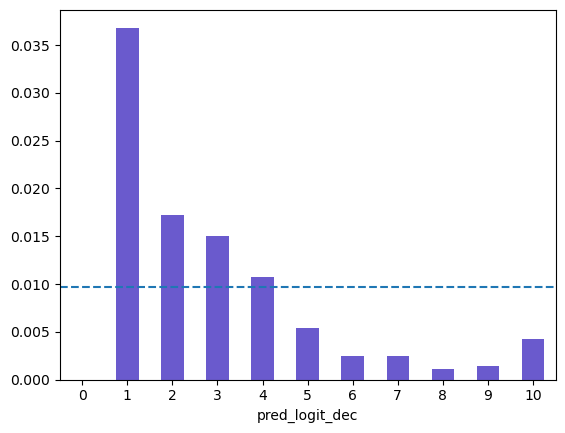

In [52]:
fig = dec_tab.plot.bar(
    x ="pred_logit_dec", y="ctr", rot=0, color="slateblue", legend=None
)
fig = fig.axhline (y=tz_gaming[tz_gaming.training == 'test'].click_yes.mean(), linestyle="--")

In [53]:
dec_tab.to_excel("dec_tab.xlsx", index=False)

## Part IV: Lift, Gains, and Profit (15 points)

Use the `dec_tab` DataFrame you created in Part III for the following calculations.

a. Write python code to generate a table with the cumulative proportion of impressions and the cumulative gains for each decile (8 points)

> Note: Do NOT use any specialized python packages to construct the gains table. Write the python code from scratch. Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains table. Be prepared to discuss the code you submit for this question in class if called upon

In [54]:
# Calculate Cumulative Number of Impressions
dec_tab['Cum_nr_imp'] = dec_tab['nr_impressions'].cumsum()

# Calculate Cumulative Proportion of Impressions
total_impressions = dec_tab['nr_impressions'].sum()
dec_tab['cum_prop'] = dec_tab['Cum_nr_imp'] / total_impressions

# Calculating gains
total_clicks = dec_tab['nr_clicks'].sum()
dec_tab['gains'] = dec_tab['nr_clicks'] / total_clicks

# Calculating cumulative gains
dec_tab['cum_gains'] = dec_tab['gains'].cumsum()

dec_tab
gains_tab=dec_tab
gains_tab

,pred_logit_dec,nr_impressions,nr_clicks,ctr,Cum_nr_imp,cum_prop,gains,cum_gains
0,0,0,0,0.000000,0,0.000000,0.000000,0.000000
1,1,2796,103,0.036838,2796,0.100025,0.380074,0.380074
2,2,2793,48,0.017186,5589,0.199943,0.177122,0.557196
3,3,2788,42,0.015065,8377,0.299682,0.154982,0.712177
4,4,2796,30,0.010730,11173,0.399707,0.110701,0.822878
5,5,2802,15,0.005353,13975,0.499946,0.055351,0.878229
6,6,2796,7,0.002504,16771,0.599971,0.025830,0.904059
7,7,2794,7,0.002505,19565,0.699925,0.025830,0.929889
8,8,2796,3,0.001073,22361,0.799950,0.011070,0.940959
9,9,2796,4,0.001431,25157,0.899975,0.014760,0.955720


b. Use `seaborn`, `matplotlib`, or `pandas` to create a chart showing the cumulative gains per decile along with a (diagonal) reference line to represent the "no model" scenario. Put cumulative gains on the Y-axis and cumulative proportion of impressions on the X-axis (7 points)

> Note: Do NOT use any specialized packages to construct the gains chart. Write the python code from scratch. Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains table. Be prepared to discuss the code you submit for this question in class if called upon

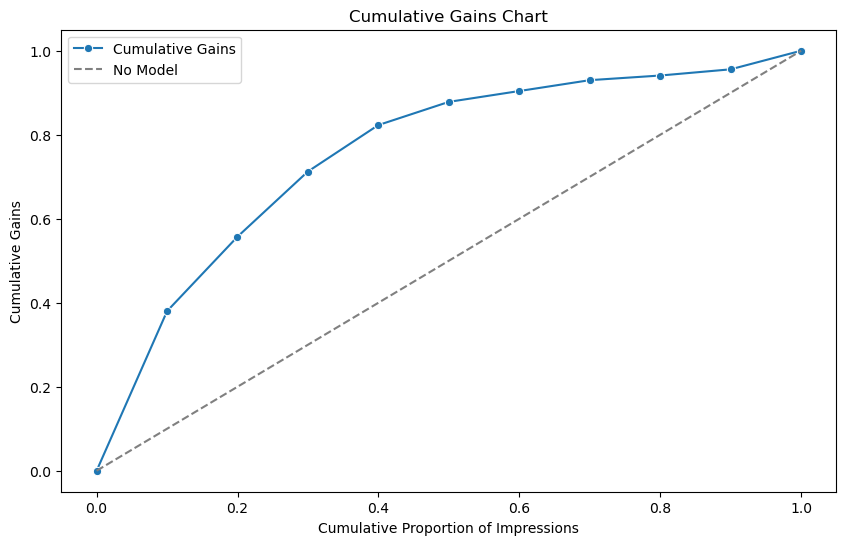

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named `dec_tab`
plt.figure(figsize=(10, 6))

# Plotting the cumulative gains
sns.lineplot(x='cum_prop', y='cum_gains', data=dec_tab, label='Cumulative Gains', marker='o')

# Adding the diagonal line for the "no model" scenario
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='No Model')

# Adding labels and title
plt.xlabel('Cumulative Proportion of Impressions')
plt.ylabel('Cumulative Gains')
plt.title('Cumulative Gains Chart')
plt.legend()

# Show the plot
plt.show()


## Part V: Confusion matrix (10 points)

a. Create a "confusion matrix" based on the predictions from the logistic regression model you estimated in Part I.a (i.e., the model used to generate `pred_logit`). Again, use **only** data from the test set here (i.e., "training == 'test'"). Use the financial assumptions mentioned above, and repeated in section VI below, to determine an appropriate cut-off (i.e., breakeven). Calculate "accuracy" based on the confusion matrix you created (2 points)

> Note: Do NOT use any specialized packages to construct the confusion matrix. Code the matrix from scratch.  Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains table. Be prepared to discuss the code you submit for this question in class if called upon

> Note use the code format below to store the relevant values from your confusion matrix

In [56]:
# Constants
CPI = 0.01  # Cost per impression
CLV = 25    # Customer Lifetime Value
Conversion_Rate = 0.05  # Conversion rate

# Calculate breakeven cut-off
breakeven_cutoff = CPI / (CLV * Conversion_Rate)

# Assuming 'tz_gaming' is your DataFrame and contains 'click' and 'pred_logit' columns
# Filter the test set
test_set = tz_gaming[tz_gaming['training'] == 'test'].copy()
breakeven_cutoff

0.008

In [57]:
# Classify based on the cut-off
test_set['predicted_click'] = test_set['pred_logit'].apply(lambda x: 'yes' if x >= breakeven_cutoff else 'no')

# Construct the confusion matrix
TP = (test_set[(test_set['predicted_click'] == 'yes') & (test_set['click'] == 'yes')]).shape[0]
FP = (test_set[(test_set['predicted_click'] == 'yes') & (test_set['click'] == 'no')]).shape[0]
TN = (test_set[(test_set['predicted_click'] == 'no') & (test_set['click'] == 'no')]).shape[0]
FN = (test_set[(test_set['predicted_click'] == 'no') & (test_set['click'] == 'yes')]).shape[0]

cm_logit = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]# TP, FP, TN, and FN values in that order]
    }
)
cm_logit


,label,nr
0,TP,221
1,FP,10661
2,TN,17021
3,FN,50


In [58]:
accuracy_logit = (TP + TN) / (TP + FP + TN + FN) # float
accuracy_logit

0.6168210925482059

b. Calculate a DataFrame with elements from a confusion matrix based on `pred_rnd` created in Part I and calculate `accuracy` based on the confusion matrix you created (2 points)

> Note use the code format below to store the relevant values from your confusion matrix

In [59]:
test_set['predicted_click'] = test_set['pred_rnd'].apply(lambda x: 'yes' if x >= breakeven_cutoff else 'no')

TP = len(test_set[(test_set['predicted_click'] == 'yes') & (test_set['click'] == 'yes')])
FP = len(test_set[(test_set['predicted_click'] == 'yes') & (test_set['click'] == 'no')])
TN = len(test_set[(test_set['predicted_click'] == 'no') & (test_set['click'] == 'no')])
FN = len(test_set[(test_set['predicted_click'] == 'no') & (test_set['click'] == 'yes')])
cm_rnd = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]# TP, FP, TN, and FN values in that order
    }
)
cm_rnd  


,label,nr
0,TP,271
1,FP,27606
2,TN,76
3,FN,0


In [60]:
accuracy_rnd = (TP + TN) / (TP + FP + TN + FN)
accuracy_rnd

0.012413694415626229

c. Discuss the similarities and differences between the two confusion matrices. Which prediction (model) is best, based on the confusion matrix? Provide support for your conclusions (3 points)

Similarities:
Both models predict similar number of True Positives, where the event of interest ('click') is correctly predicted.
Differences:
FP Rate: The rnd model has a significantly higher rate of False Positives than the logit model (27606 vs. 10661).
TN Rate: The logit model has a much higher rate of True Negatives than the rnd model (17021 vs. 76).
FN Rate: The logit model has some False Negatives (50), while the rnd model has none (0). This is possibly due to the rnd model predicting positives for nearly all observations.

Accuracy: The accuracy of the logit model is significantly higher at approximately 61.68%, while the rnd model's accuracy is just over 1.24%.

Best Prediction Model:
Based on the confusion matrix, the logit model is superior. Here are the supporting reasons:

1. Higher Accuracy: The logit model's accuracy is substantially higher, indicating that it correctly predicts a higher proportion of both 'click' and 'no click' events.
2. Balanced Approach: The logit model provides a more balanced approach to prediction, with a reasonable number of both 
3. True Positives and True Negatives.
4. Lower False Positives: The high number of False Positives in the rnd model suggests that it is predicting 'click' far too often, resulting in many incorrect predictions. This is further evidenced by the extremely low number of True Negatives.
Conclusion:
The logit model is clearly the better model for predicting clicks. It is more balanced and accurate, demonstrating a better understanding of the underlying patterns in the data. The rnd model seems to predict 'clicks' indiscriminately, resulting in a high number of False Positives and virtually no True Negatives, indicating that it is not a useful model for this purpose.

... insert your answer here ...

d. Recalculate the confusion matrices from V.a and V.b using 0.5 as the cutoff. Based on these new matrices, again discuss the similarities and differences. Which model is best based on these new confusion matrices? Provide support for your conclusions (3 points)

> Note use the code format below to store the relevant values from your confusion matrix

In [61]:
breakeven = 0.5

In [62]:
# Classify based on the cut-off
test_set['predicted_click'] = test_set['pred_logit'].apply(lambda x: 'yes' if x >= breakeven else 'no')

# Construct the confusion matrix
TP = (test_set[(test_set['predicted_click'] == 'yes') & (test_set['click'] == 'yes')]).shape[0]
FP = (test_set[(test_set['predicted_click'] == 'yes') & (test_set['click'] == 'no')]).shape[0]
TN = (test_set[(test_set['predicted_click'] == 'no') & (test_set['click'] == 'no')]).shape[0]
FN = (test_set[(test_set['predicted_click'] == 'no') & (test_set['click'] == 'yes')]).shape[0]

cm_logit_recalc = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]# TP, FP, TN, and FN values in that order
    }
)
cm_logit_recalc

,label,nr
0,TP,0
1,FP,0
2,TN,27682
3,FN,271


In [63]:
accuracy_logit_recalc = (TP + TN) / (TP + TN + FP + FN)# float
accuracy_logit_recalc

0.9903051550817443

> Note use the code format below to store the relevant values from your confusion matrix

In [64]:
test_set['predicted_click'] = test_set['pred_rnd'].apply(lambda x: 'yes' if x >= breakeven else 'no')

TP = len(test_set[(test_set['predicted_click'] == 'yes') & (test_set['click'] == 'yes')])
FP = len(test_set[(test_set['predicted_click'] == 'yes') & (test_set['click'] == 'no')])
TN = len(test_set[(test_set['predicted_click'] == 'no') & (test_set['click'] == 'no')])
FN = len(test_set[(test_set['predicted_click'] == 'no') & (test_set['click'] == 'yes')])
cm_rnd_recalc = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]# TP, FP, TN, and FN values in that order
    }
)
cm_rnd_recalc  


,label,nr
0,TP,0
1,FP,0
2,TN,27682
3,FN,271


In [65]:
accuracy_rnd_recalc = (TP + TN) / (TP + TN + FP + FN)# float
accuracy_rnd_recalc

0.9903051550817443

... add discussion here ...

Although the recalculated confusion matrices show high accuracy and no difference between the two models, neither model is effective at identifying 'clicks' at the 0.5 cutoff. For click prediction, we need a model that can correctly identify as many True Positives as possible while minimizing False Positives. In this case, a different cutoff value should be considered, or the models need to be reassessed for their ability to predict positive events accurately.







## Part VI: Model comparison (12 points)


Use the following cost information to assess the profitability each of these models for targeting purposes during the upcoming advertising campaign where TZ will purchase 20-million impressions from Vneta:

* Cost per 1,000 video impressions (CPM) is $10
* Conversion to sign-up as a TZ game player after clicking on an ad is 5%
* The expected CLV of customers that sign-up with TZ after clicking on an ad is approximately $25
* The total cost of the data from Vneta is $50K
* The total cost charged for the data science consulting services by Vneta is $150K

Use `pred_logit`, `pred_rnd`, and the predictions from Vneta based on their proprietary model `pred_vneta` to compare model performance.

> Note: The currently available data (+ the `pred_vneta` prediction) are free as part of the partnership between Vneta and TZ-gaming

a. Create a new variable `target_logit` that is `True` if the predicted click-through (`pred_logit`) probability is greater than the break-even response rate and `FALSE` otherwise (1 point)

In [66]:
tz_gaming["target_logit"] = tz_gaming.pred_logit > breakeven_cutoff
tz_gaming.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd,pred_logit_dec,click_yes,target_logit
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,1,1.408451,-1.207066,0.003961,id247135,3.382977e-13,0.009222,10,0,False
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,1069,1.588127,0.277429,0.003961,id245079,1.156355e-02,0.008751,3,0,True
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,1,0.302115,1.084441,0.003961,id927245,2.655311e-03,0.008505,7,0,False
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,1001,1.407599,-2.345698,0.018965,id922188,1.349420e-02,0.009600,3,0,True
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,2317,1.260253,0.429125,0.003961,id355833,1.868222e-03,0.008704,8,0,False


b. Create a new variable `target_rnd` that is `True` if the predicted click-through (`pred_rnd`) probability is greater than the break-even response rate and `FALSE` otherwise (1 point)

In [67]:
tz_gaming["target_rnd"] = tz_gaming.pred_rnd > breakeven_cutoff
tz_gaming.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd,pred_logit_dec,click_yes,target_logit,target_rnd
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,1.408451,-1.207066,0.003961,id247135,3.382977e-13,0.009222,10,0,False,True
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,1.588127,0.277429,0.003961,id245079,1.156355e-02,0.008751,3,0,True,True
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,0.302115,1.084441,0.003961,id927245,2.655311e-03,0.008505,7,0,False,True
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,1.407599,-2.345698,0.018965,id922188,1.349420e-02,0.009600,3,0,True,True
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,1.260253,0.429125,0.003961,id355833,1.868222e-03,0.008704,8,0,False,True


c. Create a new variable `target_vneta` that is `True` if the predicted click-through (`pred_vneta`) probability is greater than the break-even response rate and `False` otherwise (1 point)

In [68]:
# insert your answer here
tz_gaming["target_vneta"] = tz_gaming.pred_vneta > breakeven_cutoff

d. Based only on the test set (i.e, `training == "test"`), calculate the expected profit (in dollars) and the expected return on marketing expenditures (ROME) if TZ (1) `spams` everyone in the test set, (2) continues to target using their current approach (`pred_rnd`), (3) purchases the data from Vneta and uses the logistic regression from I (`pred_logit`) for targeting, or (4) used Vneta's data science consulting services (`pred_vneta`) (3 points)

> Note: For efficiency, you can adapt the `perf_calc_actual` function you created for the Tuango case to do the relevant performance calculations for the different models

In [69]:
#making a function

def perf_calc_actual(dat, model ="", perf = "click", lev =  "yes",  nr_imp= tz_gaming[tz_gaming['training'] == 'test'].shape[0]):
    perc_target = np.nanmean(dat[model])
    ctr = np.nanmean(dat.loc[dat[model], perf] == lev)

    nr_imp = nr_imp * perc_target
    nr_clicks = nr_imp * ctr 
    imp_cost = nr_imp * 0.01
    revenue = nr_clicks * 0.05 * 25
    profit = revenue - imp_cost
    ROME = profit/imp_cost

    prn = f"""
    - the number of customers TZ Gaming should target is {(nr_imp):,.0f} ({100 * perc_target:.2f}%)
    - The click-through rate for the selected customers is predicted to be {100 * ctr:.2f}% or {nr_clicks:,.0f} clicks
    - The revenue is equal to ${revenue:,.2f}
    - The expected profit is ${profit:,.2f}
    - The total impression cost is estimated to be ${imp_cost:,.2f} with a ROME of {100 * ROME:.2f}%
    """
    print(prn)

    return profit, ROME, ctr

In [70]:
# 1st method 
tz_gaming["target_spam"] = True
profit_spam, ROME_spam , ctr_spam= perf_calc_actual(tz_gaming[tz_gaming['training'] == 'test'],"target_spam")


    - the number of customers TZ Gaming should target is 27,953 (100.00%)
    - The click-through rate for the selected customers is predicted to be 0.97% or 271 clicks
    - The revenue is equal to $338.75
    - The expected profit is $59.22
    - The total impression cost is estimated to be $279.53 with a ROME of 21.19%
    


In [71]:
# 2nd method
profit_rnd, ROME_rnd , ctr_rnd= perf_calc_actual(tz_gaming[tz_gaming['training'] == 'test'],"target_rnd")


    - the number of customers TZ Gaming should target is 27,877 (99.73%)
    - The click-through rate for the selected customers is predicted to be 0.97% or 271 clicks
    - The revenue is equal to $338.75
    - The expected profit is $59.98
    - The total impression cost is estimated to be $278.77 with a ROME of 21.52%
    


In [72]:
#3rd method
profit_logit , ROME_logit , ctr_logit=  perf_calc_actual(tz_gaming[tz_gaming['training'] == 'test'],"target_logit")


    - the number of customers TZ Gaming should target is 10,882 (38.93%)
    - The click-through rate for the selected customers is predicted to be 2.03% or 221 clicks
    - The revenue is equal to $276.25
    - The expected profit is $167.43
    - The total impression cost is estimated to be $108.82 with a ROME of 153.86%
    


In [73]:
#4th method

profit_vneta , ROME_vneta , ctr_vneta = perf_calc_actual(tz_gaming[tz_gaming['training'] == 'test'],"target_vneta")


    - the number of customers TZ Gaming should target is 4,871 (17.43%)
    - The click-through rate for the selected customers is predicted to be 3.28% or 160 clicks
    - The revenue is equal to $200.00
    - The expected profit is $151.29
    - The total impression cost is estimated to be $48.71 with a ROME of 310.59%
    


In [74]:
# calculate and add profit and ROME values for each approach
# to the mod_perf data frame
tz_gaming["pred_spam"] = 1
tz_gaming["target_spam"] = True

mod_perf = pd.DataFrame(
    {
        "model": [
            "logit",
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [profit_logit, profit_rnd, profit_vneta, profit_spam],
        "ROME": [ROME_logit, ROME_rnd, ROME_vneta, ROME_spam]
    }
)
mod_perf

,model,profit,ROME
0,logit,167.43,1.538596
1,rnd,59.98,0.215159
2,vneta,151.29,3.105933
3,spam,59.22,0.211856


Given the information, I would recommend approach (3), purchasing the data from Vneta and using the logistic regression model for targeting (pred_logit). While the ROME is lower than that of Vneta's consulting services, the profit is higher.

However, the decision might also depend on additional factors not included in the calculation:

Budget Constraints: If the budget is limited, the highest ROME (vneta's consulting services) might be the best choice, as it ensures the most efficient spend of the marketing budget.
Scale of Campaign: If TZ is planning to scale up its marketing efforts, the model with the highest ROME might provide the best scalability, meaning the efficiency would pay off more as the campaign grows.
Long-term Value: If the logistic regression model identifies users with a higher lifetime value, even if the immediate ROME is lower, it might generate more revenue in the long run.
In summary, while the vneta model is the most efficient, the logistic regression model (pred_logit) is recommended for its balance of profit and efficiency, unless budget constraints or long-term considerations dictate otherwise.

e. Based on the results from VI.d discuss which of these 4 approaches you would recommend and why (2 points)

... insert your answer here ...

f. Calculate the profit and ROME implications for each of the 4 options mentioned in VI.d if TZ purchases 20-million impression for the upcoming ad campaign (2 points)

> Note: Calculate total profits under the assumption that options (3) and (4) are free of charge. Then compare the profit numbers to determine if these options would be worth the expense going forward.

> Note: For efficiency, you can adapt the `perf_calc` function you created for the Tuango case to do the relevant performance calculations for the different models.

In [75]:
#making a function
def perf_calc(ctr):
    
    nr_imp = 20000000 
    cost_imp = nr_imp * 0.01
    nr_clicks = nr_imp * ctr 
    revenue = nr_clicks * 0.05 * 25
    profit = revenue - cost_imp
    ROME = profit/cost_imp

    prn = f"""
    - the number of customers TZ Gaming should target is {(nr_imp):,.0f} 
    - The click-through rate for the selected customers is predicted to be {100 * ctr:.2f}% or {nr_clicks:,.0f} clicks
    - The revenue is equal to ${revenue:,.2f}
    - The expected profit is ${profit:,.2f}
    - The total impression cost is estimated to be ${cost_imp:,.2f} with a ROME of {100 * ROME:.2f}%
    """
    print(prn)

    return profit, ROME

In [76]:
profit_spam_20M, ROME_spam_20M = perf_calc(ctr_spam)
profit_rnd_20M, ROME_rnd_20M = perf_calc(ctr_rnd)
profit_logit_20M , ROME_logit_20M =  perf_calc(ctr_logit)
profit_vneta_20M , ROME_vneta_20M = perf_calc(ctr_vneta)


    - the number of customers TZ Gaming should target is 20,000,000 
    - The click-through rate for the selected customers is predicted to be 0.97% or 193,897 clicks
    - The revenue is equal to $242,371.12
    - The expected profit is $42,371.12
    - The total impression cost is estimated to be $200,000.00 with a ROME of 21.19%
    

    - the number of customers TZ Gaming should target is 20,000,000 
    - The click-through rate for the selected customers is predicted to be 0.97% or 194,426 clicks
    - The revenue is equal to $243,031.89
    - The expected profit is $43,031.89
    - The total impression cost is estimated to be $200,000.00 with a ROME of 21.52%
    

    - the number of customers TZ Gaming should target is 20,000,000 
    - The click-through rate for the selected customers is predicted to be 2.03% or 406,175 clicks
    - The revenue is equal to $507,719.17
    - The expected profit is $307,719.17
    - The total impression cost is estimated to be $200,000.00 wit

In [77]:
mod_perf_20M = pd.DataFrame(
    {
        "model": [
            "logit",
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [profit_logit_20M,profit_rnd_20M,profit_vneta_20M, profit_spam_20M],
        "ROME": [ROME_logit_20M,ROME_rnd_20M,ROME_vneta_20M,ROME_spam_20M]
    }
)
mod_perf_20M

,model,profit,ROME
0,logit,307719.169270,1.538596
1,rnd,43031.890089,0.215159
2,vneta,621186.614658,3.105933
3,spam,42371.122956,0.211856


g. Based on the results from VI.f, discuss which of the 4 approaches you would recommend to put into production and why. Is your recommendation different from VI.e? Why (not) (2 points)

> Note: Calculate total profits under the assumption that options (3) and (4) are free of charge. Then compare the profit numbers to determine if these options would be worth the expense going forward.

> Note: For efficiency, consider adapting the `perf_calc` function you created for the Tuango case to do the relevant performance calculations for the different models.

Given these results and assuming the costs for options (3) vneta and (4) spam are considered free for this analysis, the vneta model is the most profitable and efficient choice for TZ's 20-million impression purchase.
Even when considering future costs, the high ROME suggests that vneta's model may still be the best option going forward. The efficiency of the vneta model could potentially offset the costs associated with purchasing the data or consulting services, especially if the scale of the campaign increases. However, a cost-benefit analysis would be necessary to make a final decision on the value of these options in the context of their respective costs.

## Part VII: Generative AI (5 points)

Please describe how you used Generative AI-tools like ChatGPT to support your work on this assignment. Provide pdfs and/or screenshots of your "discussions" with these tools and comment on what things did and did not go well. Also add any questions you may have about the assignment and the support you received from GenAI so we can discuss these topics in class.

Note: No matter how you used Generative AI-tools, you will be expected to fully understand all elements of the assignment. You may be called on in class to walk us through your thought process and how different parts of your code work.

could not share the link from chatgpt for some reason so I copy pasted the conversation into a word document and uploaded it here.

file:///Users/nishmitavasant/Desktop/Chatgpt_for_tzgaming.pdf

In [83]:
dct={"test": tz_gaming[tz_gaming['training'] == 'test'], "train": tz_gaming[tz_gaming['training'] == 'train']}

In [96]:
fig =rsm.gains_plot(tz_gaming, "click", "yes", ["target_logit", "target_rnd", "target_vneta"], qnt=10)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [80]:
help(rsm.gains_plot)

Help on function gains_plot in module pyrsm.model.perf:

gains_plot(df, rvar, lev, pred, qnt=10, marker='o', **kwargs)
    Plot a cumulative gains curve
    
    Parameters
    ----------
    df : Pandas dataframe or a dictionary of dataframes with keys to show multiple curves for different models or data samples
    rvar : str
        Name of the response variable column in df
    lev : str
        Name of the 'success' level in rvar
    pred : str
        Name of the column in df with model predictions
    qnt : int
        Number of quantiles to create
    cost : int
        Cost of an action
    margin : int
        Benefit of an action if a successful outcome results from the action
    marker : str
        Marker to use for line plot
    **kwargs : Named arguments to be passed to the seaborn lineplot function
    
    Returns
    -------
    Seaborn object
        Plot of gaines per quantile
    
    Examples
    --------
    gains_plot(df, "buyer", "yes", "pred_a")
    gains_plo

<Axes: xlabel='Percentage of population targeted', ylabel='Cumulative lift'>

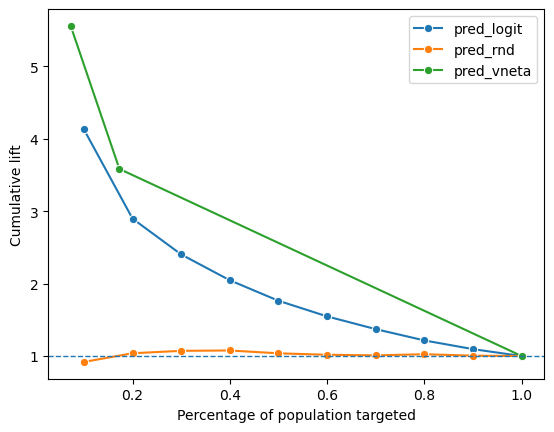

In [97]:
rsm.lift_plot(tz_gaming, "click", "yes", ["pred_logit", "pred_rnd", "pred_vneta"], qnt=10)